In [5]:
pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import numpy as np

In [11]:
# load data
df = pd.read_csv('AB_NYC_2019.csv')

# show basic info and first few rows of the data
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Data Cleaning

In [57]:
# 1) outlier detection using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# apply IQR filtering
df_iqr = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# 2) add parent-child relation flag: verify neighborhoods within groups
neigh_check = df_iqr.groupby(['neighbourhood_group', 'neighbourhood']).size().reset_index(name='count')

# 3) standardization & normalization for later use

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

numerical_cols = ['minimum_nights', 'availability_365', 'price']
df_standard = df.copy()
df_standard[numerical_cols] = scaler_standard.fit_transform(df_standard[numerical_cols])

df_normalized = df.copy()
df_normalized[numerical_cols] = scaler_minmax.fit_transform(df_normalized[numerical_cols])

# Label Encoding for categorical variables
for col in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    le = LabelEncoder()
    df_standard[col] = le.fit_transform(df_standard[col])
    df_normalized[col] = le.fit_transform(df_normalized[col])

# check
neigh_check

,neighbourhood_group,neighbourhood,count
0,Bronx,Allerton,41
1,Bronx,Baychester,7
2,Bronx,Belmont,24
3,Bronx,Bronxdale,19
4,Bronx,Castle Hill,9
...,...,...,...
214,Staten Island,Tompkinsville,42
215,Staten Island,Tottenville,7
216,Staten Island,West Brighton,18
217,Staten Island,Westerleigh,2


### Exploratory Data Analysis (EDA)


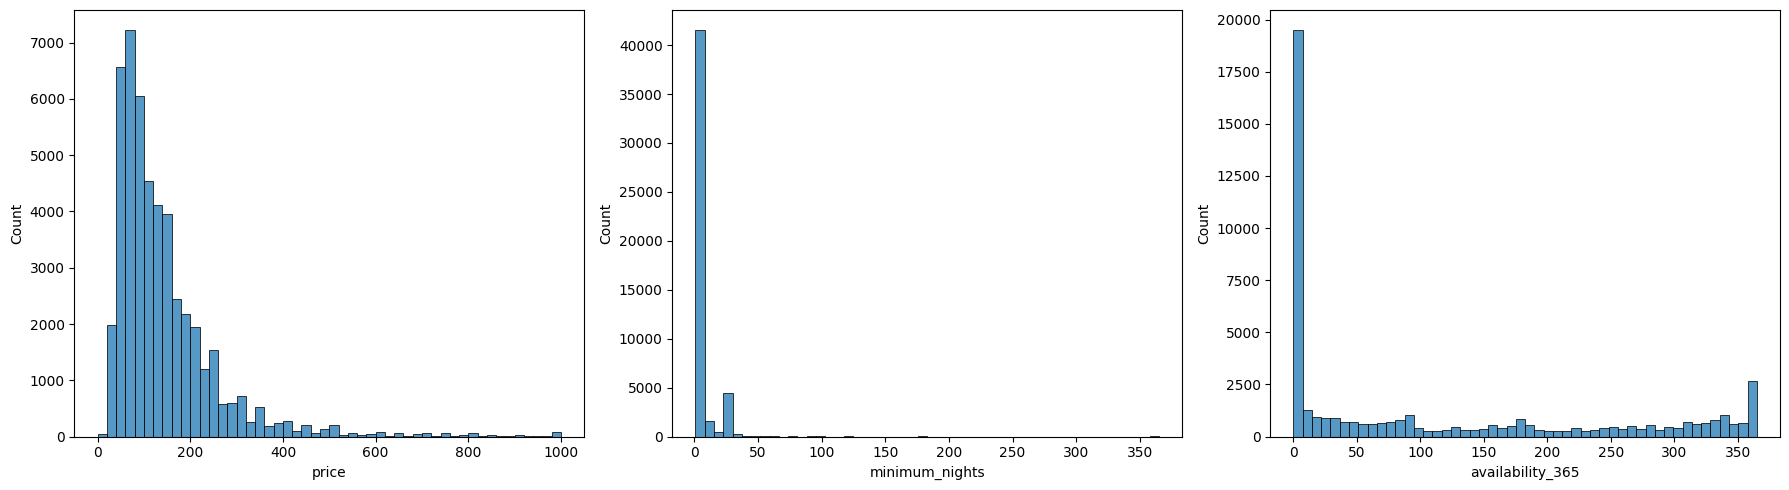

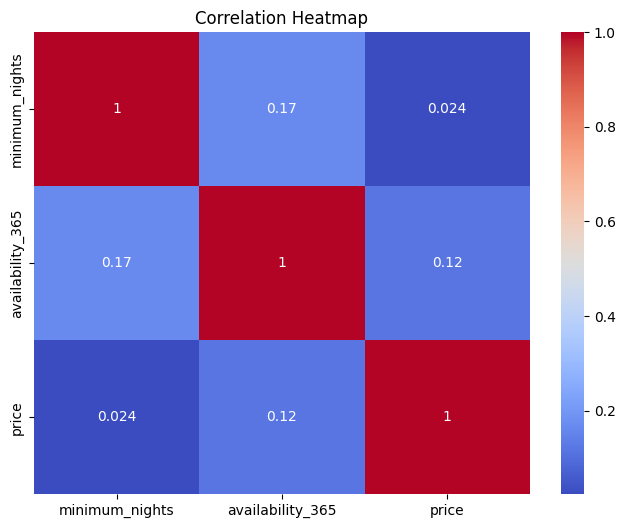

In [58]:
# Histograms
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['price'], bins=50, ax=axs[0])
sns.histplot(df['minimum_nights'], bins=50, ax=axs[1])
sns.histplot(df['availability_365'], bins=50, ax=axs[2])
plt.tight_layout()
plt.show()

numerical_cols = ['minimum_nights', 'availability_365', 'price']
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### neighborhood/neighborhood group

##### (1) group mean price comparison

In [59]:
mean_prices_group = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
mean_prices_neigh = df.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean()
print('Average Price of Neighborhood Groups:', mean_prices_group)
print()
print('Average Price of Neighborhoods', mean_prices_neigh)

Average Price of Neighborhood Groups: neighbourhood_group
Manhattan        178.934413
Brooklyn         117.819298
Staten Island     98.584906
Queens            94.983021
Bronx             85.283486
Name: price, dtype: float64

Average Price of Neighborhoods neighbourhood_group  neighbourhood
Bronx                Allerton          87.595238
                     Baychester        75.428571
                     Belmont           77.125000
                     Bronxdale         57.105263
                     Castle Hill       63.000000
                                         ...    
Staten Island        Tottenville      144.857143
                     West Brighton     80.555556
                     Westerleigh       71.500000
                     Willowbrook      249.000000
                     Woodrow          700.000000
Name: price, Length: 221, dtype: float64


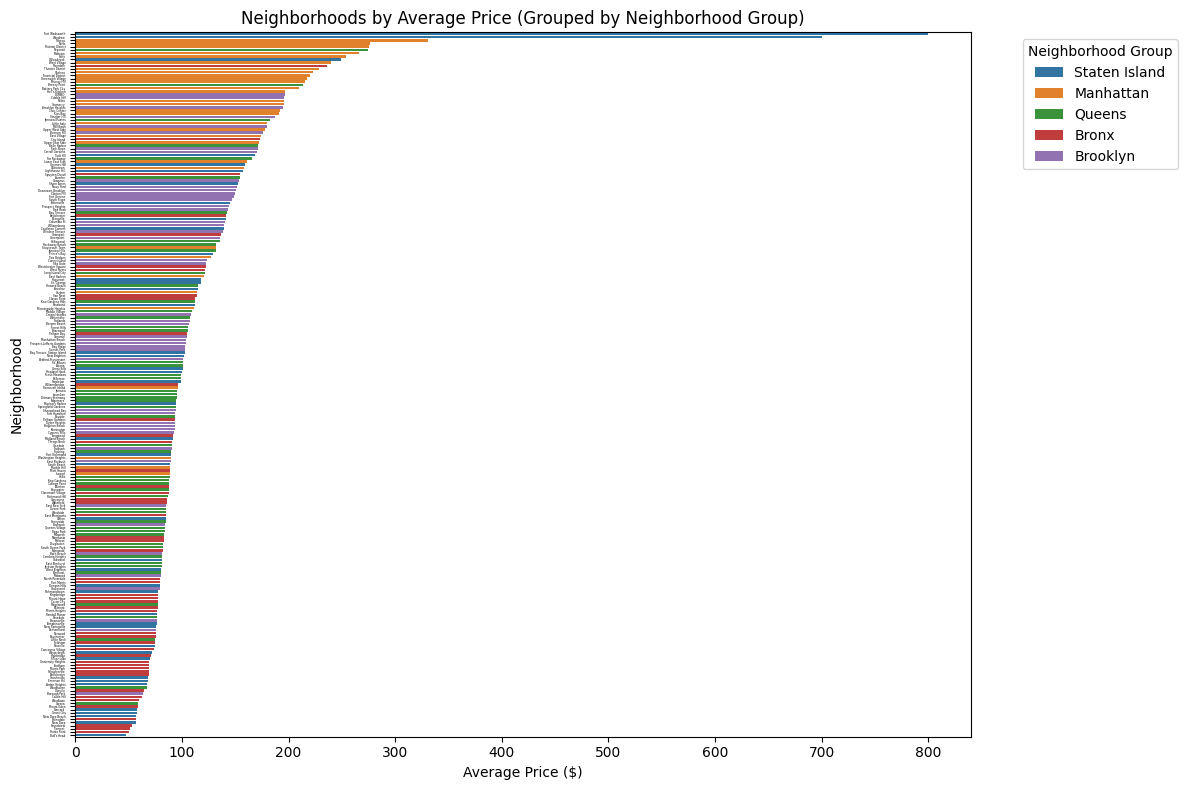

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
220,Staten Island,Woodrow,700.000000
121,Manhattan,Tribeca,330.393939
115,Manhattan,NoHo,276.246753
102,Manhattan,Flatiron District,275.052632
163,Queens,Neponsit,274.666667
112,Manhattan,Midtown,265.703607
118,Manhattan,SoHo,254.342857
219,Staten Island,Willowbrook,249.000000
126,Manhattan,West Village,239.493369


In [60]:
# grouped mean price by neighbourhood group AND neighbourhood
grouped_neigh_combined = df.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().reset_index()

# sort by price descending
grouped_neigh_combined = grouped_neigh_combined.sort_values('price', ascending=False)

# plot
plt.figure(figsize=(12,8))
sns.barplot(x='price',y='neighbourhood', hue='neighbourhood_group',data=grouped_neigh_combined,dodge=False)

plt.title('Neighborhoods by Average Price (Grouped by Neighborhood Group)')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood')
plt.yticks(fontsize=2)
plt.legend(title='Neighborhood Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# show the 15 most expensive neighborhood
grouped_neigh_combined.head(15)

- In general, Manhanttan is much more expensive than the other boroughs.
- In neighborhoods, Fort Wadsworth and Woodrow (Staten Island) looks weridly high, but small sample sizes may cause that.
- Bronx is the least expensive neighborhood group in general.

##### (2) ANOVA Test

In [61]:

# ANOVA: Does average price differ significantly by neighbourhood group?
groups = [df[df['neighbourhood_group'] == group]['price'] for group in df['neighbourhood_group'].unique()]
anova_neigh_group = f_oneway(*groups)

anova_neigh_group

F_onewayResult(statistic=np.float64(1159.3181110641706), pvalue=np.float64(0.0))

For ANOVA Test, we are trying to figure out: Does average price differ significantly by neighborhood group?
- Null Hypothesis: The average price of the listings does not differ by neighborhood group and neighborhood.
- For neighborhood group, the p-value is 0 and f-stats is 1159.32, which means the average price is significantly different among groups.
- In conclusion, location matters a lot for the pricing of Airbnb listing. 

### Minimum nights

##### (1) scatter plot

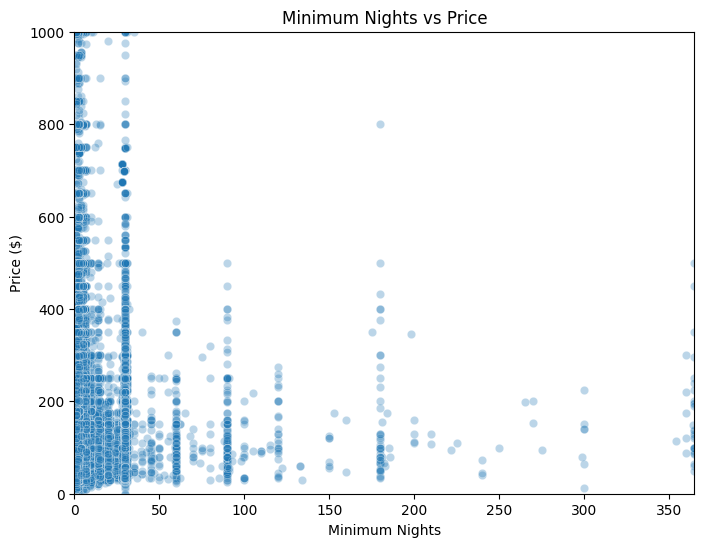

In [62]:
# scatter plot of minimum nights vs. price
plt.figure(figsize=(8,6))
sns.scatterplot(x='minimum_nights', y='price', data=df, alpha=0.3)
plt.title('Minimum Nights vs Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price ($)')
plt.xlim(0, 365)  
plt.ylim(0, 1000)
plt.show()

- There is no strong visible trend.
- Very short minimum night listing (1-3 nights) have both low and high prices.
- Longer minimum night listing can also have low and high prices.

##### (2) correlation

In [63]:
X_min_nights = df[['minimum_nights']]
y_price = df['price']
reg_min_nights = LinearRegression().fit(X_min_nights, y_price)

In [64]:
# get coefficient and intercept
slope = reg_min_nights.coef_[0]
intercept = reg_min_nights.intercept_

# print the regression equation
print('Regression equation: y =', slope, '* x +', intercept)

Regression equation: y = 0.17244254305368223 * x + 140.11121998395998


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


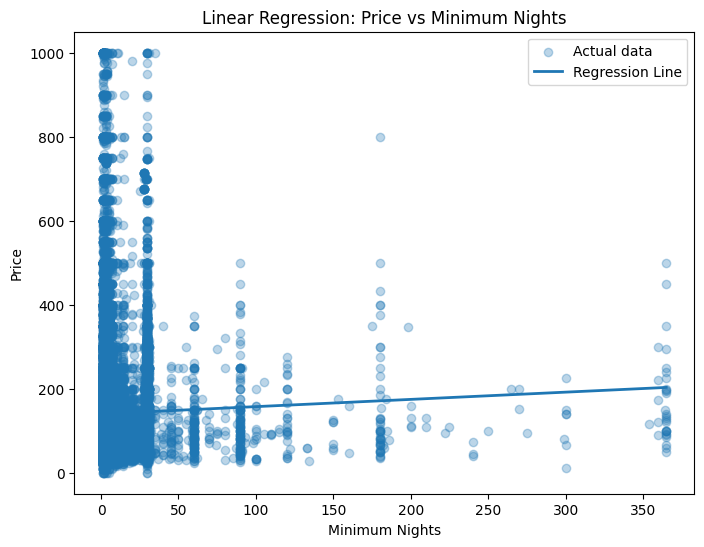

In [65]:
# scatter plot of the actual data
plt.figure(figsize=(8,6))
plt.scatter(X_min_nights, y_price, alpha=0.3, label='Actual data')

# line plot of the regression prediction
X_range = np.linspace(X_min_nights.min(), X_min_nights.max(), 100).reshape(-1,1)
y_predicted = reg_min_nights.predict(X_range)
plt.plot(X_range, y_predicted, label='Regression Line', linewidth=2)

# labels and title
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Minimum Nights')
plt.legend()
plt.show()


In [66]:
# add a constant (intercept) term to X
X_min_nights_with_const = sm.add_constant(X_min_nights)

# fit the OLS (ordinary least squares) regression
model = sm.OLS(y_price, X_min_nights_with_const).fit()

# summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     27.60
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           1.50e-07
Time:                        14:16:54   Log-Likelihood:            -3.0054e+05
No. Observations:               48642   AIC:                         6.011e+05
Df Residuals:                   48640   BIC:                         6.011e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            140.1112      0.574    244.

- The slope is 0.17, which means for each additional night added to the minimum nights requirement, the listing price increases by about $0.17 on average. 
- Listing with higher minimum stay requirement tend to have slightly higher prices, but the effect is very small.
- The p-value for minimum_nights shows how statistically significant the slope is. Since p-value is zero, the slope is statistically significant. 

##### (3) Binned Analysis

/var/folders/7d/_n326km93lxclrv58s18_wdm0000gn/T/ipykernel_35805/1510500550.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_min_nights = df.groupby('min_nights_bin')['price'].mean()


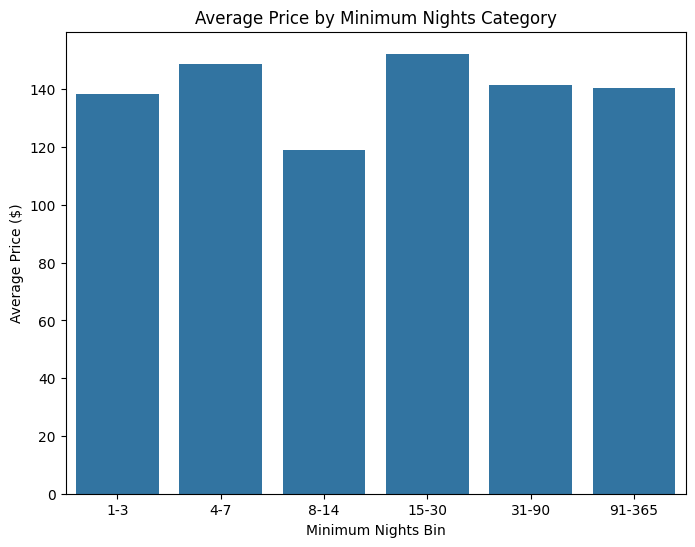

min_nights_bin
1-3       138.447285
4-7       148.604585
8-14      119.007003
15-30     152.320383
31-90     141.393657
91-365    140.508772
Name: price, dtype: float64

In [67]:
# bin minimum nights
bins = [0, 3, 7, 14, 30, 90, 365]
labels = ['1-3', '4-7', '8-14', '15-30', '31-90', '91-365']
df['min_nights_bin'] = pd.cut(df['minimum_nights'], bins=bins, labels=labels)

# grouped mean price by minimum nights bin
grouped_min_nights = df.groupby('min_nights_bin')['price'].mean()

# plot
plt.figure(figsize=(8,6))
sns.barplot(x=grouped_min_nights.index, y=grouped_min_nights.values)
plt.title('Average Price by Minimum Nights Category')
plt.xlabel('Minimum Nights Bin')
plt.ylabel('Average Price ($)')
plt.show()

grouped_min_nights

- Listings that require 4-7 nights or 15-30 nights have slightly higher prices.
- Still, the difference is modest - not a dominant factor.
- Minimum nights requirement has weak impact on price.

##### (4) Clustering Listings by Minimum Nights

In [68]:
X_clust_min = df[['minimum_nights', 'price']]
scores_min = {}
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_clust_min)
    scores_min[k] = silhouette_score(X_clust_min, kmeans.labels_)

best_k_min = max(scores_min, key=scores_min.get)
kmeans_min = KMeans(n_clusters=best_k_min, random_state=42).fit(X_clust_min)

print('Best number of clusters (k):', best_k_min)


Best number of clusters (k): 2


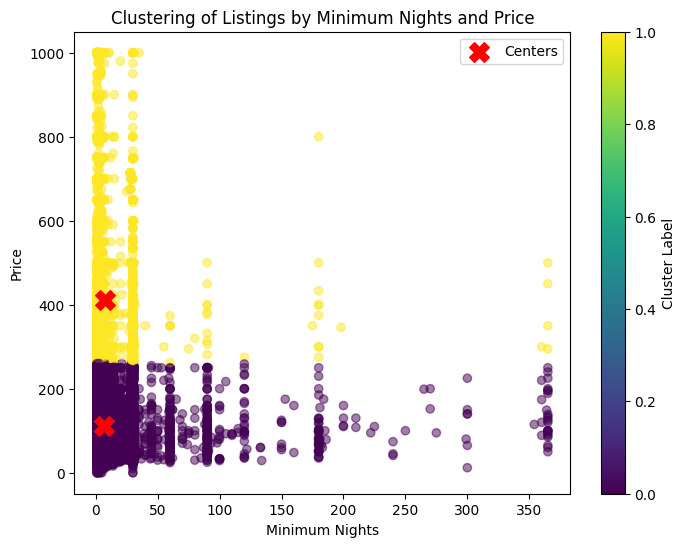

In [69]:
# scatter plot with clusters
plt.figure(figsize=(8,6))
plt.scatter(X_clust_min['minimum_nights'], X_clust_min['price'], 
            c=kmeans_min.labels_, cmap='viridis', alpha=0.5)

# plot the cluster centers
centers = kmeans_min.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X', label='Centers')

plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Clustering of Listings by Minimum Nights and Price')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


- Based on the silhouette scores, the best number of clusters is k = 2. This means the Airbnb listing naturally form about 2 distinct groups when considering their minimum requrement and price together. Each group (cluster) represents listings with similar minimum night policies and similar price levels. 
- The red X markers on the plot show the center of each cluster, giving a rough "typical" minimum_nigths and price for that cluster.
- From the clustering, we can see that the two clusters differ in price but bot spread across a large range of different minimum nights. This shows that minimum_nights has little correlation with the price of the listings. 

### Room Type Impact

##### (1) Grouped Mean Price

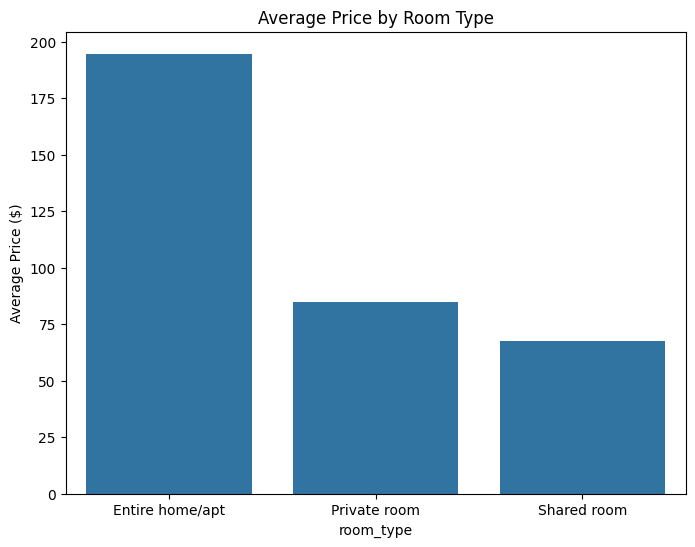

In [70]:
grouped_room_type = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

# plot
plt.figure(figsize=(8,6))
sns.barplot(x=grouped_room_type.index, y=grouped_room_type.values)
plt.title('Average Price by Room Type')
plt.ylabel('Average Price ($)')
plt.show()

##### (2) ANOVA Test for Room Type

In [71]:
# ANOVA Test for Room Type
groups_room_type = [df[df['room_type'] == rt]['price'] for rt in df['room_type'].unique()]
anova_room_type = f_oneway(*groups_room_type)

grouped_room_type, anova_room_type

(room_type
 Entire home/apt    194.603316
 Private room        84.765802
 Shared room         67.578220
 Name: price, dtype: float64,
 F_onewayResult(statistic=np.float64(7057.457914422446), pvalue=np.float64(0.0)))

- Entire apartments are priced much higher than private room or shared rooms. 
- Price drops drastically if you're only renting part of a place.
- For ANOVA Test, F-statistics = 7057.46 and p-value = 0, which is a very evidence that room type significantly affect price.

##### (3) Regression

In [72]:
X_room = pd.get_dummies(df['room_type'], drop_first=True)
y_room = df['price']
reg_room = LinearRegression().fit(X_room, y_room)

In [73]:
# get coefficients and intercept
intercept = reg_room.intercept_
coefficients = reg_room.coef_

# match coefficient names with dummy columns
coef_table = pd.DataFrame({
    'Room Type': X_room.columns,
    'Coefficient': coefficients
})

# print intercept
print('Intercept:', intercept)

# print coefficients for each room type
print(coef_table)

Intercept: 194.60331627592424
      Room Type  Coefficient
0  Private room  -109.837515
1   Shared room  -127.025097


- Note: Entire home/apt is dropped to avoid multicollinearity (dummy variable trap). It becomes the reference category, so its effect is captured inside the intercept. 
- Price = Intercept + (Private Room Coefficient) * (Private Room Dummy) + (Shared Room Coefficient) * (Shared Room Dummy)
- The intercept is 194.6, which is the price of the entire home/apt (when the dummy varibles for private room and shared room are both 0).
- Private room is 109.84 less expensive than an entire home/apt.
- Shared room is 127.03 less expensive than an entire home/apt. 
- Again, this proves that renting an entire apt is more expensive than renting part of a place. 

### Availability Impact on Price

##### (1) Scatter plot of availability vs. price

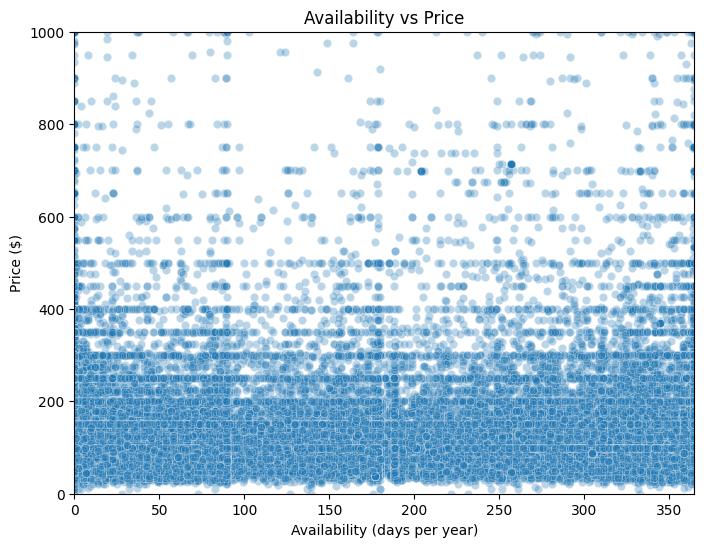

In [74]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.3)
plt.title('Availability vs Price')
plt.xlabel('Availability (days per year)')
plt.ylabel('Price ($)')
plt.xlim(0, 365)
plt.ylim(0, 1000)
plt.show()

##### (2) regression

In [75]:
X_avail = df[['availability_365']]
reg_avail = LinearRegression().fit(X_avail, y_price)

Regression equation: y = 0.10473125528500124 * x + 129.50980066430083


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


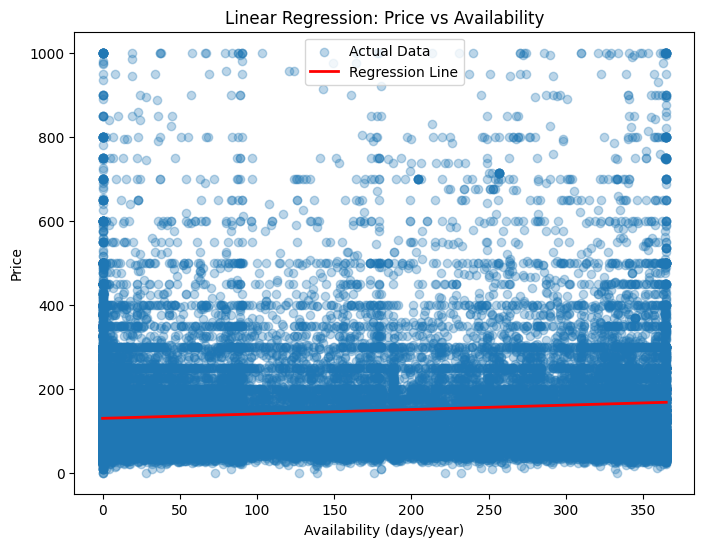

In [76]:
# slope and intercept
slope = reg_avail.coef_[0]
intercept = reg_avail.intercept_

print('Regression equation: y =', slope, '* x +', intercept)

# scatter plot of the real data
plt.figure(figsize=(8,6))
plt.scatter(X_avail, y_price, alpha=0.3, label='Actual Data')

# create a line for the regression
X_range = np.linspace(X_avail.min(), X_avail.max(), 100).reshape(-1,1)
y_pred = reg_avail.predict(X_range)

# plot regression line
plt.plot(X_range, y_pred, color='red', label='Regression Line', linewidth=2)

# labels and title
plt.xlabel('Availability (days/year)')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Availability')
plt.legend()
plt.show()


In [77]:
X_avail_with_const = sm.add_constant(X_avail)

# fit the OLS regression
model_avail = sm.OLS(y_price, X_avail_with_const).fit()

# show the summary
print(model_avail.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     685.4
Date:                Sat, 26 Apr 2025   Prob (F-statistic):          4.94e-150
Time:                        14:18:20   Log-Likelihood:            -3.0021e+05
No. Observations:               48642   AIC:                         6.004e+05
Df Residuals:                   48640   BIC:                         6.004e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              129.5098      0.692  

##### (3) Binned Analaysis

/var/folders/7d/_n326km93lxclrv58s18_wdm0000gn/T/ipykernel_35805/819013109.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_availability = df.groupby('availability_bin')['price'].mean()


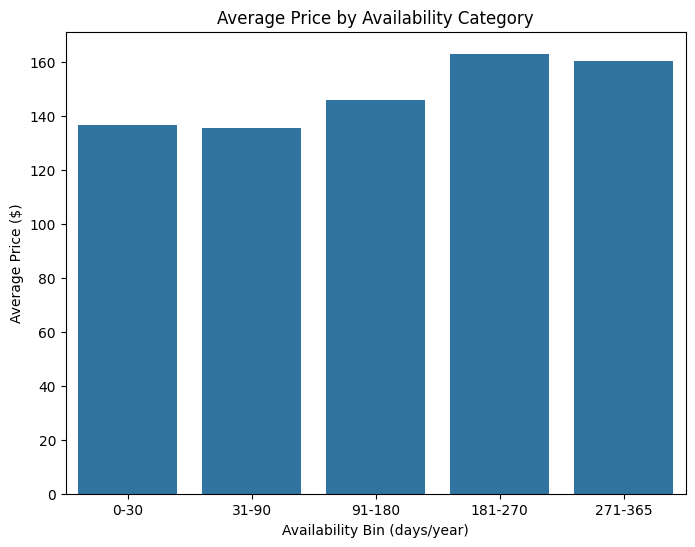

availability_bin
0-30       136.394607
31-90      135.470304
91-180     145.928069
181-270    162.883467
271-365    160.275943
Name: price, dtype: float64

In [78]:
# Method 3: Binned Analysis
bins_avail = [0, 30, 90, 180, 270, 365]
labels_avail = ['0-30', '31-90', '91-180', '181-270', '271-365']
df['availability_bin'] = pd.cut(df['availability_365'], bins=bins_avail, labels=labels_avail)

# Grouped Mean Price by Availability Bin
grouped_availability = df.groupby('availability_bin')['price'].mean()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=grouped_availability.index, y=grouped_availability.values)
plt.title('Average Price by Availability Category')
plt.xlabel('Availability Bin (days/year)')
plt.ylabel('Average Price ($)')
plt.show()

grouped_availability

- From the scatterplot, we discover no visible trend visualy between availability and price.
- The regression coefficient between availability and price is 0.1, which is a weak but positive relationship - more available listings may be priced a bit higher.
- The p-value is equal to 0, which means that we should reject the null hypothesis that the slope is zero and say there is a significant relationship.
- Listings available more than half the year (181-365 days) are about $20-30 more expensive than listings available only a few weeks. 

### Decision Tree Feature Importance

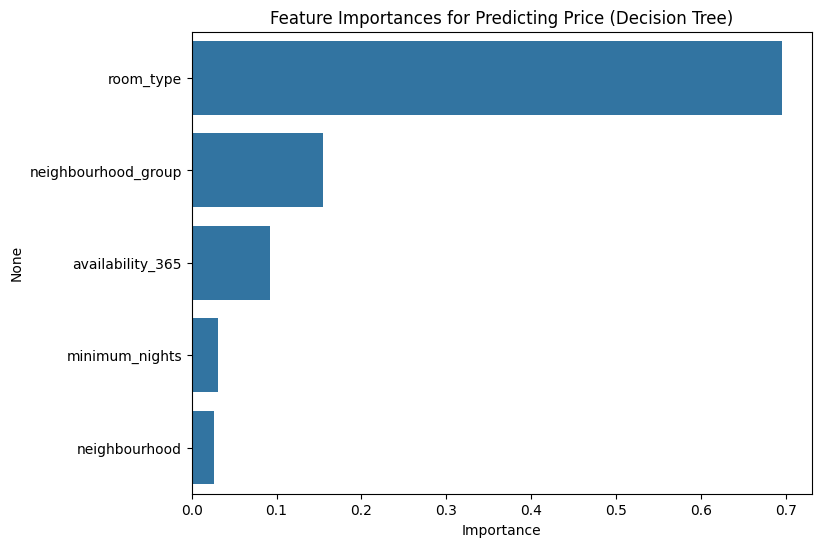

room_type              0.696051
neighbourhood_group    0.155002
availability_365       0.092437
minimum_nights         0.030453
neighbourhood          0.026058
dtype: float64

In [79]:
# encode categorical variables
df_model = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights', 'availability_365', 'price']].copy()
label_encoders = {}
for col in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# split data into train and test
X = df_model.drop('price', axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train decision tree
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# feature Importances
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)

# plot
plt.figure(figsize=(8,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importances for Predicting Price (Decision Tree)')
plt.xlabel('Importance')
plt.show()

importances

- Room Type is the most important (~69%) in predicting price.
- Neighborhood group and availability have a small importance, but still non-trivial.

### Predictive Modeling

In [82]:
# define X and y for modeling
X_full = df_standard[['minimum_nights', 'availability_365', 'neighbourhood_group', 'room_type']]
y_full = df['price']

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# 1. linear regression
reg_full = LinearRegression()
reg_full.fit(X_train, y_train)
y_pred_reg = reg_full.predict(X_test)

# 2. KNN regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 3. decision tree regression
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)


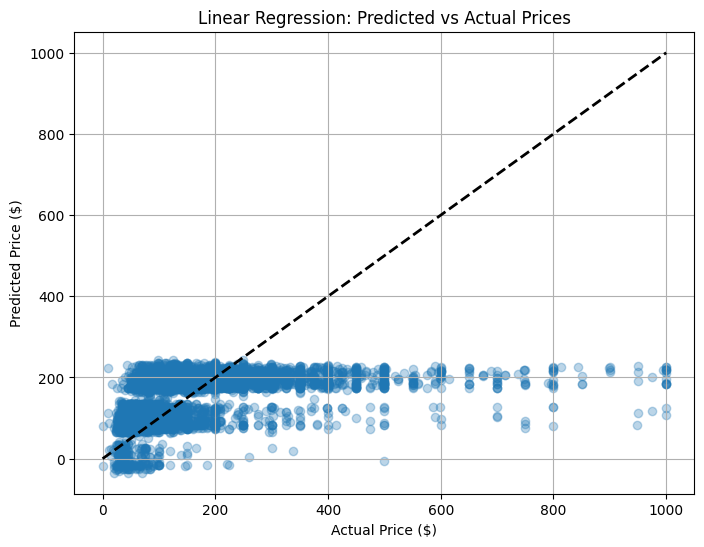

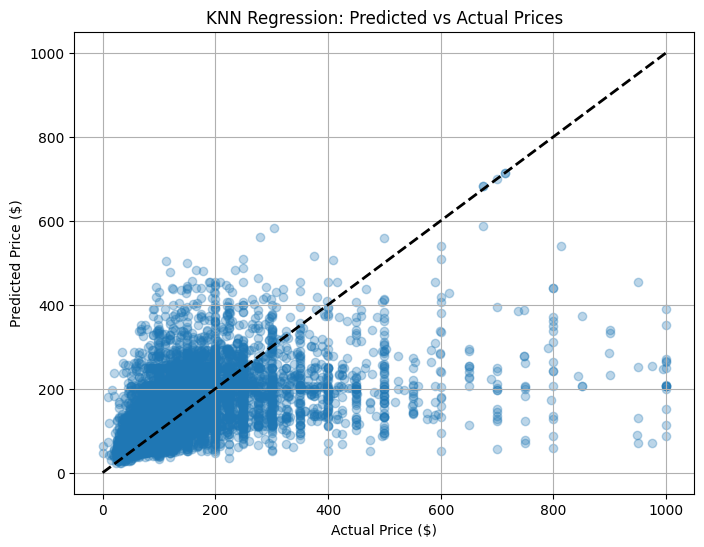

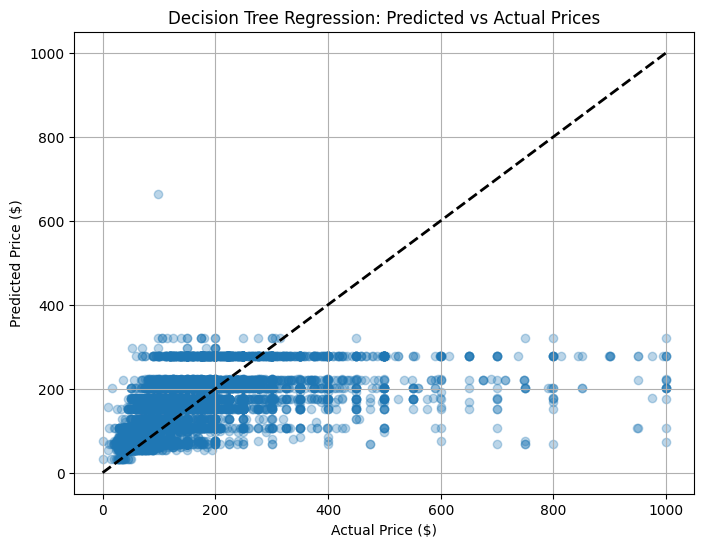

In [83]:
# plotting function
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.title(f'{model_name}: Predicted vs Actual Prices')
    plt.xlabel('Actual Price ($)')
    plt.ylabel('Predicted Price ($)')
    plt.grid(True)
    plt.show()

# linear regression
plot_predictions(y_test, y_pred_reg, "Linear Regression")

# KNN regression
plot_predictions(y_test, y_pred_knn, "KNN Regression")

# decision tree regression
plot_predictions(y_test, y_pred_tree, "Decision Tree Regression")


In [84]:
# evaluation function
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"----- {model_name} -----")
    print('RMSE:', round(rmse, 2))
    print('MAE:', round(mae, 2))
    print('R2:', round(r2, 4))
    print()

# Evaluate all models
evaluate(y_test, y_pred_reg, "Linear Regression")
evaluate(y_test, y_pred_knn, "KNN Regression")
evaluate(y_test, y_pred_tree, "Decision Tree Regression")

----- Linear Regression -----
RMSE: 99.08
MAE: 60.31
R2: 0.2389

----- KNN Regression -----
RMSE: 98.5
MAE: 57.95
R2: 0.2478

----- Decision Tree Regression -----
RMSE: 93.81
MAE: 54.74
R2: 0.3178



- Decision Tree Regression is the best model here. 
- All models still have a lot of variance unexplained, so I will try to do a PCA.

### PCA for dimensionality reduction

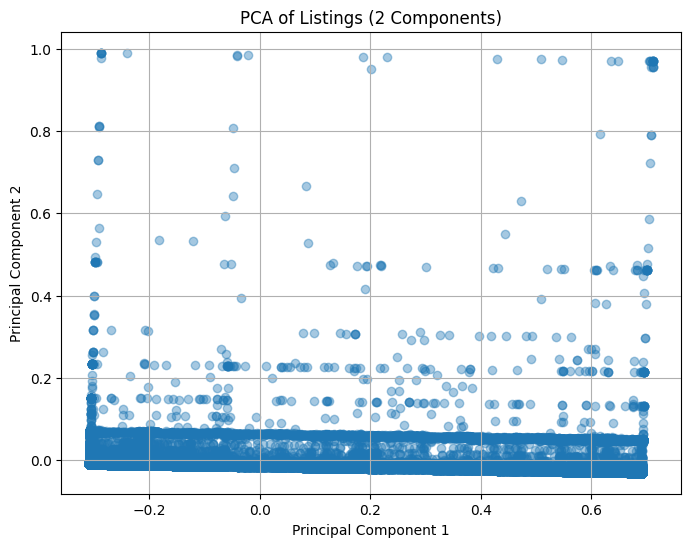

array([0.98550181, 0.01449819])

In [87]:
# perform PCA on normalized features: minimum_nights, availability_365
X_pca_input = df_normalized[['minimum_nights', 'availability_365']]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca_input)

# explained variance
explained_variance = pca.explained_variance_ratio_

# scatter plot of PCA results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.4)
plt.title('PCA of Listings (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

explained_variance

- The first two principal components together explain 98.56% of the variance. 
- PC1 captures the majority (98.55%), which is mostly driven by strong scale differences among price, availablity_365, and minimum_nights.
- PC2 captures secondary patterns like slight variations orthogonal to the main spread.